In [1]:
!pip install plotly
!pip install fredapi > /dev/null

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## Gather the Api key from fred api website

In [3]:
from fredapi import Fred
fred_key = "10fa8dc23d9030cd8361912e66b7a398" #Make sure to update your one key

##  Create a fred object instance

In [4]:
fred = Fred(api_key=fred_key)
fred

## 2. Search for economic data

In [5]:
sp_search = fred.search('S&P', order_by="popularity")
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-10-24   2023-10-24   
CSUSHPINSA          CSUSHPINSA     2023-10-24   2023-10-24   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-10-24   2023-10-24   
SP500                    SP500     2023-10-24   2023-10-24   
MEHOINUSA672N    MEHOINUSA672N     2023-10-24   2023-10-24   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-10-23  Daily, Close   
CSUSHPINSA            1987-01-01      2023-07-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-10-23  Daily, Close   
SP500                 2013-10-25      2023-10-24  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2021 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-10-24 08:44:02-05:00   
CSUSHPINSA                           NSA  2023-09-26 08:11:02-05:00   
BAMLH0A0HYM2EY                       NSA  2023-10-24 08:44:06-05:00   
SP500                                NSA  2023-10-24 19:10:55-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...  
SP500                  82  The observations for the S&P 500 represent the...  
MEHOINUSA672N          81  Household data are collected as of March.  As ...

## 3. Pull raw data & plot

In [6]:
sp_500= fred.get_series(series_id='SP500')

<AxesSubplot:title={'center':'S&P 500'}>

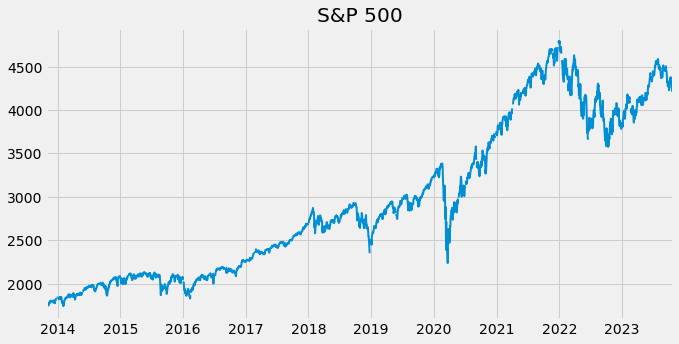

In [7]:
sp_500.plot(figsize=(10,5), title="S&P 500", lw=2)

## Pull and Join Unemployment Data Series

In [8]:
unemployment_series= fred.search('unemployment')
unemployment_series

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2023-10-24   2023-10-24   
UNRATENSA                          UNRATENSA     2023-10-24   2023-10-24   
UNEMPLOY                            UNEMPLOY     2023-10-24   2023-10-24   
NROU                                    NROU     2023-10-24   2023-10-24   
CCSA                                    CCSA     2023-10-24   2023-10-24   
...                                      ...            ...          ...   
LAUCN470930000000003A  LAUCN470930000000003A     2023-10-24   2023-10-24   
LAUCN120570000000003A  LAUCN120570000000003A     2023-10-24   2023-10-24   
LAUCN130570000000003A  LAUCN130570000000003A     2023-10-24   2023-10-24   
MNREDL5URN                        MNREDL5URN     2023-10-24   2023-10-24   
LAUCN060870000000003A  LAUCN060870000000003A     2023-10-24   2023-10-24   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
UNRATENSA                                         Unemployment Rate   
UNEMPLOY                                         Unemployment Level   
NROU                               Noncyclical Rate of Unemployment   
CCSA                        Continued Claims (Insured Unemployment)   
...                                                             ...   
LAUCN470930000000003A          Unemployment Rate in Knox County, TN   
LAUCN120570000000003A  Unemployment Rate in Hillsborough County, FL   
LAUCN130570000000003A      Unemployment Rate in Cherokee County, GA   
MNREDL5URN                 Unemployment Rate in Red Lake County, MN   
LAUCN060870000000003A    Unemployment Rate in Santa Cruz County, CA   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2023-09-01   
UNRATENSA                    1948-01-01      2023-09-01   
UNEMPLOY                     1948-01-01      2023-09-01   
NROU                         1949-01-01      2025-10-01   
CCSA                         1967-01-07      2023-10-07   
...                                 ...             ...   
LAUCN470930000000003A        1990-01-01      2022-01-01   
LAUCN120570000000003A        1990-01-01      2022-01-01   
LAUCN130570000000003A        1990-01-01      2022-01-01   
MNREDL5URN                   1990-01-01      2023-08-01   
LAUCN060870000000003A        1990-01-01      2022-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN470930000000003A                   Annual               A   
LAUCN120570000000003A                   Annual               A   
LAUCN130570000000003A                   Annual               A   
MNREDL5URN                             Monthly               M   
LAUCN060870000000003A                   Annual               A   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
NROU                                Percent                  %   
CCSA                                 Number             Number   
...                                     

In [132]:
unrate= fred.get_series('UNRATE')
unrate


1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
Length: 909, dtype: float64

<AxesSubplot:>

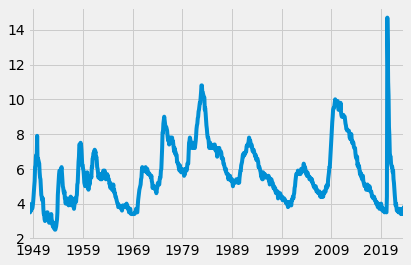

In [11]:
unrate.plot()

In [214]:
unemployment_df= fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"' )
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]
unemployment_df


id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-10-24   2023-10-24   
LNS14000006            LNS14000006     2023-10-24   2023-10-24   
CAUR                          CAUR     2023-10-24   2023-10-24   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-10-24   2023-10-24   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-10-24   2023-10-24   
...                            ...            ...          ...   
CNEWUR                      CNEWUR     2023-10-24   2023-10-24   
LNS14000150            LNS14000150     2023-10-24   2023-10-24   
LRUN25TTUSM156S    LRUN25TTUSM156S     2023-10-24   2023-10-24   
CNERUR                      CNERUR     2023-10-24   2023-10-24   
LNS14000093            LNS14000093     2023-10-24   2023-10-24   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   
M0892BUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
CNEWUR             Unemployment Rate in New England Census Division   
LNS14000150                         Unemployment Rate - Married Men   
LRUN25TTUSM156S   Unemployment Rate: Aged 25-54: All Persons for...   
CNERUR                 Unemployment Rate in Northeast Census Region   
LNS14000093                          Unemployment Rate - 45-54 Yrs.   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-09-01   Monthly               M   
LNS14000006             1972-01-01      2023-09-01   Monthly               M   
CAUR                    1976-01-01      2023-09-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
CNEWUR                  1976-01-01      2023-09-01   Monthly               M   
LNS14000150             1955-01-01      2023-09-01   Monthly               M   
LRUN25TTUSM156S         1960-01-01      2023-08-01   Monthly               M   
CNERUR                  1976-01-01      2023-09-01   Monthly               M   
LNS14000093             1948-01-01      2023-09-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
CNEWUR            Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   
CNERUR            Percent           %  Seasonally Adjusted   
LNS14000093       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-10-06 07:46:02-05:00   
LNS14000006                             SA  2023-10-06 07:46:05-05:00   
CAUR                                    SA  2023-10-24 08:53:02-05:00   
M0892AUSM156SNBR                    

In [133]:
all_results = []
for my_id in unemployment_df.index:
    results= fred.get_series(my_id)
    results = results.to_frame(name=my_id) #looking forward to be merged with other stuff
    all_results.append(results)
    
    

In [230]:
print(type(results))
print(type(all_results))
print(len(all_results))
print(len(unemployment_df.index))

<class 'pandas.core.frame.DataFrame'>
<class 'list'>
98
98


In [74]:
all_results[4]

M0892BUSM156SNBR
1940-01-01             15.53
1940-02-01               NaN
1940-03-01             15.03
1940-04-01             15.82
1940-05-01             15.50
...                      ...
1946-08-01              3.73
1946-09-01              3.97
1946-10-01              4.00
1946-11-01              3.96
1946-12-01              4.16

[84 rows x 1 columns]

In [231]:
unemployment_results = pd.concat(all_results, axis=1)
unemployment_results

UNRATE  LNS14000006  CAUR  M0892AUSM156SNBR  M0892BUSM156SNBR  \
1929-04-01     NaN          NaN   NaN              0.69               NaN   
1929-05-01     NaN          NaN   NaN              1.65               NaN   
1929-06-01     NaN          NaN   NaN              2.06               NaN   
1929-07-01     NaN          NaN   NaN              0.79               NaN   
1929-08-01     NaN          NaN   NaN              0.04               NaN   
...            ...          ...   ...               ...               ...   
2023-05-01     3.7          5.6   4.5               NaN               NaN   
2023-06-01     3.6          6.0   4.6               NaN               NaN   
2023-07-01     3.5          5.8   4.6               NaN               NaN   
2023-08-01     3.8          5.3   4.6               NaN               NaN   
2023-09-01     3.8          5.7   4.7               NaN               NaN   

            TXUR  NYUR  U2RATE  LNS14000002  LNS14000024  FLUR  LNS14000031  \
1929-04-01   NaN   NaN     NaN          NaN          NaN   NaN          NaN   
1929-05-01   NaN   NaN     NaN          NaN          NaN   NaN          NaN   
1929-06-01   NaN   NaN     NaN          NaN          NaN   NaN          NaN   
1929-07-01   NaN   NaN     NaN          NaN          NaN   NaN          NaN   
1929-08-01   NaN   NaN     NaN          NaN          NaN   NaN          NaN   
...          ...   ...     ...          ...          ...   ...          ...   
2023-05-01   4.1   3.9     1.8          3.6          3.4   2.6          5.6   
2023-06-01   4.1   3.9     1.7          3.4          3.3   2.6          5.9   
2023-07-01   4.1   3.9     1.6          3.4          3.2   2.7          5.3   
2023-08-01   4.1   3.9     1.7          3.5          3.5   2.7          5.0   
2023-09-01   4.1   4.0     1.7          3.4          3.5   2.8          5.6   

            LNS14000009  LNS14024887  LNS14000001  LNS14000003  OHUR  MIUR  \
1929-04-01          NaN          NaN          NaN          NaN   NaN   NaN   
1929-05-01          NaN          NaN          NaN          NaN   NaN   NaN   
1929-06-01          NaN          NaN          NaN          NaN   NaN   NaN   
1929-07-01          NaN          NaN          NaN          NaN   NaN   NaN   
1929-08-01          NaN          NaN          NaN          NaN   NaN   NaN   
...                 ...          ...          ...          ...   ...   ...   
2023-05-01          4.0          7.4          3.7          3.3   3.6   3.7   
2023-06-01          4.3          7.5          3.7          3.1   3.4   3.6   
2023-07-01          4.4          8.0          3.6          3.1   3.3   3.6   
2023-08-01          4.9          8.6          4.0          3.4   3.4   3.7   
2023-09-01          4.6          8.4          4.1          3.4   3.4   3.9   

            PAUR  COUR  ALUR  LNS14027660  KYUR  NCUR  LRUN64TTUSM156S  AZUR  \
1929-04-01   NaN   NaN   NaN          NaN   NaN   NaN              NaN   NaN   
1929-05-01   NaN   NaN   NaN          NaN   NaN   NaN              NaN   NaN   
1929-06-01   NaN   NaN   NaN          NaN   NaN   NaN              NaN   NaN   
1929-07-01   NaN   NaN   NaN          NaN   NaN   NaN              NaN   NaN   
1929-08-01   NaN   NaN   NaN          NaN   NaN   NaN              NaN   NaN   
...          ...   ...   ...          ...   ...   ...              ...   ...   
2023-05-01   4.0   2.8   2.2          3.9   3.8   3.4         3.656172   3.4   
2023-06-01   3.8   2.8   2.2          3.9   3.8   3.3         3.625227   3.5   
2023-07-01   3.5   2.9   2.1          3.4   3.9   3.3         3.621984   3.6   
2023-08-01   3.5   3.1   2.1          3.8   4.0   3.3         3.783071   3.8   
2023-09-01   3.4   3.2   2.2          4.1   4.1   3.4              NaN   4.0   

            ILUR  NJUR  LNS14027662  TNUR  WAUR  VAUR  ORUR  WIUR  GAUR  IAUR  \
1929-04-01   NaN   NaN          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN 

In [249]:
unemployment_states = unemployment_results.drop('UNRATE', axis=1)
unemployment_states

LNS14000006  CAUR  M0892AUSM156SNBR  M0892BUSM156SNBR  TXUR  NYUR  \
1929-04-01          NaN   NaN              0.69               NaN   NaN   NaN   
1929-05-01          NaN   NaN              1.65               NaN   NaN   NaN   
1929-06-01          NaN   NaN              2.06               NaN   NaN   NaN   
1929-07-01          NaN   NaN              0.79               NaN   NaN   NaN   
1929-08-01          NaN   NaN              0.04               NaN   NaN   NaN   
...                 ...   ...               ...               ...   ...   ...   
2023-05-01          5.6   4.5               NaN               NaN   4.1   3.9   
2023-06-01          6.0   4.6               NaN               NaN   4.1   3.9   
2023-07-01          5.8   4.6               NaN               NaN   4.1   3.9   
2023-08-01          5.3   4.6               NaN               NaN   4.1   3.9   
2023-09-01          5.7   4.7               NaN               NaN   4.1   4.0   

            U2RATE  LNS14000002  LNS14000024  FLUR  LNS14000031  LNS14000009  \
1929-04-01     NaN          NaN          NaN   NaN          NaN          NaN   
1929-05-01     NaN          NaN          NaN   NaN          NaN          NaN   
1929-06-01     NaN          NaN          NaN   NaN          NaN          NaN   
1929-07-01     NaN          NaN          NaN   NaN          NaN          NaN   
1929-08-01     NaN          NaN          NaN   NaN          NaN          NaN   
...            ...          ...          ...   ...          ...          ...   
2023-05-01     1.8          3.6          3.4   2.6          5.6          4.0   
2023-06-01     1.7          3.4          3.3   2.6          5.9          4.3   
2023-07-01     1.6          3.4          3.2   2.7          5.3          4.4   
2023-08-01     1.7          3.5          3.5   2.7          5.0          4.9   
2023-09-01     1.7          3.4          3.5   2.8          5.6          4.6   

            LNS14024887  LNS14000001  LNS14000003  OHUR  MIUR  PAUR  COUR  \
1929-04-01          NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-05-01          NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-06-01          NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-07-01          NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-08-01          NaN          NaN          NaN   NaN   NaN   NaN   NaN   
...                 ...          ...          ...   ...   ...   ...   ...   
2023-05-01          7.4          3.7          3.3   3.6   3.7   4.0   2.8   
2023-06-01          7.5          3.7          3.1   3.4   3.6   3.8   2.8   
2023-07-01          8.0          3.6          3.1   3.3   3.6   3.5   2.9   
2023-08-01          8.6          4.0          3.4   3.4   3.7   3.5   3.1   
2023-09-01          8.4          4.1          3.4   3.4   3.9   3.4   3.2   

            ALUR  LNS14027660  KYUR  NCUR  LRUN64TTUSM156S  AZUR  ILUR  NJUR  \
1929-04-01   NaN          NaN   NaN   NaN              NaN   NaN   NaN   NaN   
1929-05-01   NaN          NaN   NaN   NaN              NaN   NaN   NaN   NaN   
1929-06-01   NaN          NaN   NaN   NaN              NaN   NaN   NaN   NaN   
1929-07-01   NaN          NaN   NaN   NaN              NaN   NaN   NaN   NaN   
1929-08-01   NaN          NaN   NaN   NaN              NaN   NaN   NaN   NaN   
...          ...          ...   ...   ...              ...   ...   ...   ...   
2023-05-01   2.2          3.9   3.8   3.4         3.656172   3.4   4.1   3.6   
2023-06-01   2.2          3.9   3.8   3.3         3.625227   3.5   4.0   3.7   
2023-07-01   2.1          3.4   3.9   3.3         3.621984   3.6   4.0   3.9   
2023-08-01   2.1          3.8   4.0   3.3         3.783071   3.8   4.1   4.2   
2023-09-01   2.2          4.1   4.1   3.4              NaN   4.0   4.4   4.4   

            LNS14027662  TNUR  WAUR  VAUR  ORUR  WIUR  GAUR  IAUR  MNUR  MAUR  \
1929-04-01          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01          NaN   NaN 

In [317]:
# Assuming your DataFrame is named df
us_states_columns = [col for col in unemployment_states.columns if len(col) == 4 and col.isalpha()]
us_states_columns

[]

In [251]:
# Drop rows with NaN values
unemployment_states = unemployment_states[us_states_columns].dropna()
unemployment_states

CAUR  TXUR  NYUR  FLUR  OHUR  MIUR  PAUR  COUR  ALUR  KYUR  NCUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.1   9.9   8.0   5.8   6.6   5.6   6.4   
1976-02-01   9.2   5.8  10.3   9.7   8.1   9.9   8.1   5.7   6.6   5.6   6.4   
1976-03-01   9.1   5.9  10.2   9.6   8.1   9.9   8.1   5.7   6.6   5.6   6.4   
1976-04-01   9.1   5.9  10.2   9.5   8.0   9.8   8.1   5.6   6.5   5.6   6.3   
1976-05-01   9.0   5.9  10.1   9.3   7.8   9.6   8.1   5.6   6.4   5.5   6.1   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-05-01   4.5   4.1   3.9   2.6   3.6   3.7   4.0   2.8   2.2   3.8   3.4   
2023-06-01   4.6   4.1   3.9   2.6   3.4   3.6   3.8   2.8   2.2   3.8   3.3   
2023-07-01   4.6   4.1   3.9   2.7   3.3   3.6   3.5   2.9   2.1   3.9   3.3   
2023-08-01   4.6   4.1   3.9   2.7   3.4   3.7   3.5   3.1   2.1   4.0   3.3   
2023-09-01   4.7   4.1   4.0   2.8   3.4   3.9   3.4   3.2   2.2   4.1   3.4   

            AZUR  ILUR  NJUR  TNUR  WAUR  VAUR  ORUR  WIUR  GAUR  IAUR  MNUR  \
1976-01-01  10.2   6.6  10.3   6.0   8.5   6.1   9.5   5.8   8.4   4.3   6.0   
1976-02-01  10.2   6.6  10.3   6.0   8.5   6.1   9.5   5.8   8.4   4.3   6.0   
1976-03-01  10.1   6.6  10.3   6.0   8.4   6.1   9.4   5.7   8.4   4.3   5.9   
1976-04-01  10.0   6.6  10.3   6.0   8.5   6.0   9.2   5.6   8.3   4.2   5.8   
1976-05-01   9.8   6.6  10.3   5.9   8.5   5.9   9.1   5.5   8.1   4.1   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-05-01   3.4   4.1   3.6   3.3   4.1   2.9   3.7   2.4   3.2   2.7   2.9   
2023-06-01   3.5   4.0   3.7   3.2   3.8   2.7   3.5   2.5   3.2   2.7   2.9   
2023-07-01   3.6   4.0   3.9   3.1   3.6   2.5   3.4   2.6   3.2   2.7   3.0   
2023-08-01   3.8   4.1   4.2   3.1   3.6   2.5   3.4   2.9   3.3   2.9   3.1   
2023-09-01   4.0   4.4   4.4   3.2   3.6   2.5   3.5   3.1   3.4   3.0   3.1   

            MAUR  MOUR  MDUR  ARUR  HIUR  NMUR  PRUR  WVUR  INUR  LAUR  SCUR  \
1976-01-01  10.5   5.9   6.4   7.3   9.8   8.6  19.6   7.5   6.6   6.3   7.4   
1976-02-01  10.5   5.9   6.4   7.3   9.8   8.7  19.5   7.5   6.6   6.3   7.4   
1976-03-01  10.5   5.9   6.4   7.3   9.8   8.7  19.3   7.5   6.5   6.3   7.3   
1976-04-01  10.3   6.0   6.4   7.2   9.7   8.6  19.0   7.5   6.3   6.4   7.2   
1976-05-01  10.1   6.0   6.5   7.1   9.4   8.6  18.9   7.4   6.0   6.5   7.0   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-05-01   2.8   2.5   2.4   2.7   3.1   3.5   6.1   3.3   3.1   3.6   3.1   
2023-06-01   2.6   2.6   2.0   2.6   3.0   3.5   6.1   3.3   3.2   3.6   3.1   
2023-07-01   2.5   2.7   1.8   2.6   2.8   3.6   6.2   3.4   3.3   3.4   3.1   
2023-08-01   2.6   2.8   1.7   2.7   2.8   3.7   6.2   3.6   3.4   3.3   3.0   
2023-09-01   2.6   2.9   1.6   2.9   2.8   3.7   6.0   3.8   3.6   3.3   2.9   

            NDUR  NVUR  UTUR  MSUR  DCUR  AKUR  KSUR  OKUR  RIUR  CTUR  IDUR  \
1976-01-01   3.4   9.2   5.8   6.7   8.7   7.1   4.2   5.8   7.8   9.8   5.6   
1976-02-01   3.4   9.2   5.9   6.7   8.7   7.1   4.2   5.8   7.8   9.8   5.6   
1976-03-01   3.4   9.2   5.8   6.6   8.6   7.0   4.2   5.8   7.7   9.8   5.6   
1976-04-01   3.5   9.0   5.8   6.4   8.5   6.9   4.2   5.8   7.7   9.6   5.6   
1976-05-01   3.6   8.9   5.7   6.3   8.4   6.9   4.2   5.7   7.7   9.4   5.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-05-01   2.1   5.4   2.3   3.2   5.1   3.6   2.9   2.8   3.0   3.7   2.6   
2023-06-01   2.0   5.4   2.4   3.1   5.1   3.7   2.8   2.7   2.9   3.7   2.7   
2023-07-01   2.0   5.3   2.4   3.0   5.0   3.8   2.7   2.7   2.8   3.6   2.8   
2023-08-01   1.9   5.4   2.5   3.2   5.0   3.9   2.7   2.8   2.7   3.5   3.0   
2023-09-01   1.9   5.4   2.6   3.2   5.0   4.1   2.8   3.0   2.6   3.5   3.1   

            MTUR  WYUR  VTUR  MEUR  SDUR  DEUR  NEUR  NHUR  
1976-01-01   5.8   4.1   8.6   8.7   3.3   8.0   3.3   6.5  
1976-02-01   5.8   4.1   8.6   8.7   3.3   8.0

In [261]:
us_states_df = unemployment_df[unemployment_df.index.isin(us_states_columns)]
us_states_df

id realtime_start realtime_end  \
series id                                     
CAUR       CAUR     2023-10-24   2023-10-24   
TXUR       TXUR     2023-10-24   2023-10-24   
NYUR       NYUR     2023-10-24   2023-10-24   
FLUR       FLUR     2023-10-24   2023-10-24   
OHUR       OHUR     2023-10-24   2023-10-24   
MIUR       MIUR     2023-10-24   2023-10-24   
PAUR       PAUR     2023-10-24   2023-10-24   
COUR       COUR     2023-10-24   2023-10-24   
ALUR       ALUR     2023-10-24   2023-10-24   
KYUR       KYUR     2023-10-24   2023-10-24   
NCUR       NCUR     2023-10-24   2023-10-24   
AZUR       AZUR     2023-10-24   2023-10-24   
ILUR       ILUR     2023-10-24   2023-10-24   
NJUR       NJUR     2023-10-24   2023-10-24   
TNUR       TNUR     2023-10-24   2023-10-24   
WAUR       WAUR     2023-10-24   2023-10-24   
VAUR       VAUR     2023-10-24   2023-10-24   
ORUR       ORUR     2023-10-24   2023-10-24   
WIUR       WIUR     2023-10-24   2023-10-24   
GAUR       GAUR     2023-10-24   2023-10-24   
IAUR       IAUR     2023-10-24   2023-10-24   
MNUR       MNUR     2023-10-24   2023-10-24   
MAUR       MAUR     2023-10-24   2023-10-24   
MOUR       MOUR     2023-10-24   2023-10-24   
MDUR       MDUR     2023-10-24   2023-10-24   
ARUR       ARUR     2023-10-24   2023-10-24   
HIUR       HIUR     2023-10-24   2023-10-24   
NMUR       NMUR     2023-10-24   2023-10-24   
PRUR       PRUR     2023-10-24   2023-10-24   
WVUR       WVUR     2023-10-24   2023-10-24   
INUR       INUR     2023-10-24   2023-10-24   
LAUR       LAUR     2023-10-24   2023-10-24   
SCUR       SCUR     2023-10-24   2023-10-24   
NDUR       NDUR     2023-10-24   2023-10-24   
NVUR       NVUR     2023-10-24   2023-10-24   
UTUR       UTUR     2023-10-24   2023-10-24   
MSUR       MSUR     2023-10-24   2023-10-24   
DCUR       DCUR     2023-10-24   2023-10-24   
AKUR       AKUR     2023-10-24   2023-10-24   
KSUR       KSUR     2023-10-24   2023-10-24   
OKUR       OKUR     2023-10-24   2023-10-24   
RIUR       RIUR     2023-10-24   2023-10-24   
CTUR       CTUR     2023-10-24   2023-10-24   
IDUR       IDUR     2023-10-24   2023-10-24   
MTUR       MTUR     2023-10-24   2023-10-24   
WYUR       WYUR     2023-10-24   2023-10-24   
VTUR       VTUR     2023-10-24   2023-10-24   
MEUR       MEUR     2023-10-24   2023-10-24   
SDUR       SDUR     2023-10-24   2023-10-24   
DEUR       DEUR     2023-10-24   2023-10-24   
NEUR       NEUR     2023-10-24   2023-10-24   
NHUR       NHUR     2023-10-24   2023-10-24   

                                                   title observation_start  \
series id                                                                    
CAUR                     Unemployment Rate in California        1976-01-01   
TXUR                          Unemployment Rate in Texas        1976-01-01   
NYUR                       Unemployment Rate in New York        1976-01-01   
FLUR                        Unemployment Rate in Florida        1976-01-01   
OHUR                           Unemployment Rate in Ohio        1976-01-01   
MIUR                       Unemployment Rate in Michigan        1976-01-01   
PAUR                   Unemployment Rate in Pennsylvania        1976-01-01   
COUR                       Unemployment Rate in Colorado        1976-01-01   
ALUR                        Unemployment Rate in Alabama        1976-01-01   
KYUR                       Unemployment Rate in Kentucky        1976-01-01   
NCUR                 Unemployment Rate in North Carolina        1976-01-01   
AZUR                        Unemployment Rate in Arizona        1976-01-01   
ILUR                       Unemployment Rate in Illinois        1976-01-01   
NJUR                     Unemployment Rate in New Jersey        1976-01-01   
TNUR                      Unemployment Rate in Tennessee        1976-01-01   
WAUR                     Unemployment Rate in Washington        1976-01-01   
VAUR                       Unemployment Rate in Virginia        1976-0

In [253]:
px.line(unemployment_states)

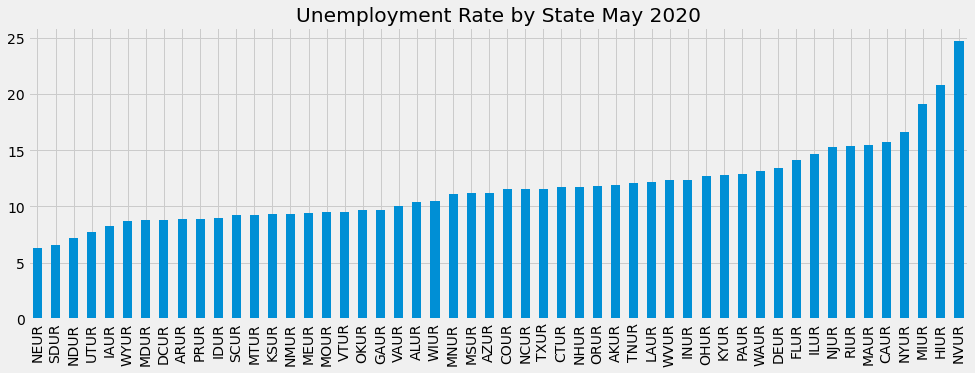

In [171]:
ax = unemployment_states.loc[unemployment_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind="bar", figsize=(15, 5), title="Unemployment Rate by State May 2020")
ax.legend().remove()
plt.show()

## You will notice X-axis identifiers are different and thats because I've printed this seond graphic after running us_states_df

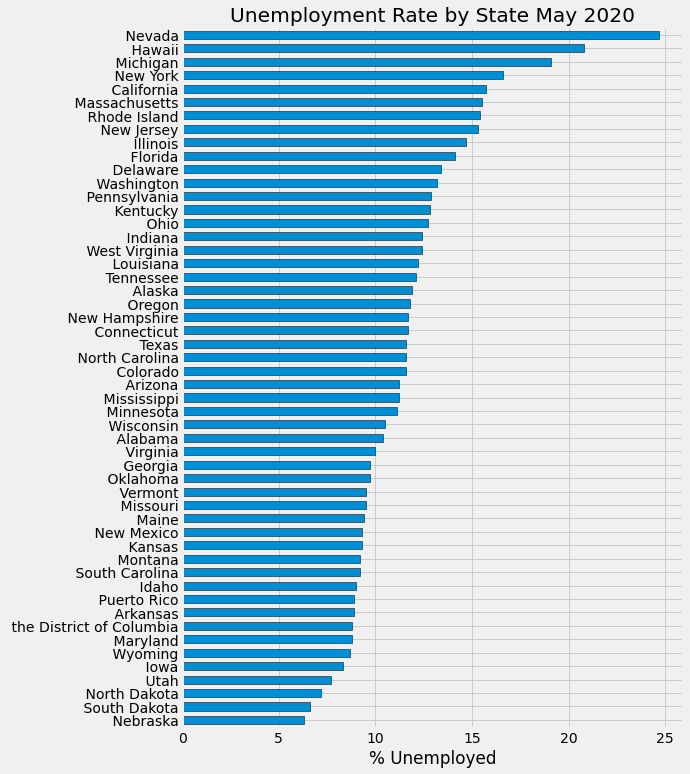

In [258]:
ax = unemployment_states.loc[unemployment_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind="barh", figsize=(8, 12), width=0.6, edgecolor="black", title="Unemployment Rate by State May 2020")
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [315]:
id_to_state=us_states_df['title'].str.replace('Unemployment Rate in', '').to_dict()
id_to_state

{'CAUR': ' California',
 'TXUR': ' Texas',
 'NYUR': ' New York',
 'FLUR': ' Florida',
 'OHUR': ' Ohio',
 'MIUR': ' Michigan',
 'PAUR': ' Pennsylvania',
 'COUR': ' Colorado',
 'ALUR': ' Alabama',
 'KYUR': ' Kentucky',
 'NCUR': ' North Carolina',
 'AZUR': ' Arizona',
 'ILUR': ' Illinois',
 'NJUR': ' New Jersey',
 'TNUR': ' Tennessee',
 'WAUR': ' Washington',
 'VAUR': ' Virginia',
 'ORUR': ' Oregon',
 'WIUR': ' Wisconsin',
 'GAUR': ' Georgia',
 'IAUR': ' Iowa',
 'MNUR': ' Minnesota',
 'MAUR': ' Massachusetts',
 'MOUR': ' Missouri',
 'MDUR': ' Maryland',
 'ARUR': ' Arkansas',
 'HIUR': ' Hawaii',
 'NMUR': ' New Mexico',
 'PRUR': ' Puerto Rico',
 'WVUR': ' West Virginia',
 'INUR': ' Indiana',
 'LAUR': ' Louisiana',
 'SCUR': ' South Carolina',
 'NDUR': ' North Dakota',
 'NVUR': ' Nevada',
 'UTUR': ' Utah',
 'MSUR': ' Mississippi',
 'DCUR': ' the District of Columbia',
 'AKUR': ' Alaska',
 'KSUR': ' Kansas',
 'OKUR': ' Oklahoma',
 'RIUR': ' Rhode Island',
 'CTUR': ' Connecticut',
 'IDUR': ' Id

In [256]:
unemployment_states.columns=[id_to_state[us_states_columns] for us_states_columns in unemployment_states.columns]

In [257]:
unemployment_states

California   Texas   New York   Florida   Ohio   Michigan  \
1976-01-01          9.2     5.8       10.3       9.7    8.1        9.9   
1976-02-01          9.2     5.8       10.3       9.7    8.1        9.9   
1976-03-01          9.1     5.9       10.2       9.6    8.1        9.9   
1976-04-01          9.1     5.9       10.2       9.5    8.0        9.8   
1976-05-01          9.0     5.9       10.1       9.3    7.8        9.6   
...                 ...     ...        ...       ...    ...        ...   
2023-05-01          4.5     4.1        3.9       2.6    3.6        3.7   
2023-06-01          4.6     4.1        3.9       2.6    3.4        3.6   
2023-07-01          4.6     4.1        3.9       2.7    3.3        3.6   
2023-08-01          4.6     4.1        3.9       2.7    3.4        3.7   
2023-09-01          4.7     4.1        4.0       2.8    3.4        3.9   

             Pennsylvania   Colorado   Alabama   Kentucky   North Carolina  \
1976-01-01            8.0        5.8       6.6        5.6              6.4   
1976-02-01            8.1        5.7       6.6        5.6              6.4   
1976-03-01            8.1        5.7       6.6        5.6              6.4   
1976-04-01            8.1        5.6       6.5        5.6              6.3   
1976-05-01            8.1        5.6       6.4        5.5              6.1   
...                   ...        ...       ...        ...              ...   
2023-05-01            4.0        2.8       2.2        3.8              3.4   
2023-06-01            3.8        2.8       2.2        3.8              3.3   
2023-07-01            3.5        2.9       2.1        3.9              3.3   
2023-08-01            3.5        3.1       2.1        4.0              3.3   
2023-09-01            3.4        3.2       2.2        4.1              3.4   

             Arizona   Illinois   New Jersey   Tennessee   Washington  \
1976-01-01      10.2        6.6         10.3         6.0          8.5   
1976-02-01      10.2        6.6         10.3         6.0          8.5   
1976-03-01      10.1        6.6         10.3         6.0          8.4   
1976-04-01      10.0        6.6         10.3         6.0          8.5   
1976-05-01       9.8        6.6         10.3         5.9          8.5   
...              ...        ...          ...         ...          ...   
2023-05-01       3.4        4.1          3.6         3.3          4.1   
2023-06-01       3.5        4.0          3.7         3.2          3.8   
2023-07-01       3.6        4.0          3.9         3.1          3.6   
2023-08-01       3.8        4.1          4.2         3.1          3.6   
2023-09-01       4.0        4.4          4.4         3.2          3.6   

             Virginia   Oregon   Wisconsin   Georgia   Iowa   Minnesota  \
1976-01-01        6.1      9.5         5.8       8.4    4.3         6.0   
1976-02-01        6.1      9.5         5.8       8.4    4.3         6.0   
1976-03-01        6.1      9.4         5.7       8.4    4.3         5.9   
1976-04-01        6.0      9.2         5.6       8.3    4.2         5.8   
1976-05-01        5.9      9.1         5.5       8.1    4.1         5.7   
...               ...      ...         ...       ...    ...         ...   
2023-05-01        2.9      3.7         2.4       3.2    2.7         2.9   
2023-06-01        2.7      3.5         2.5       3.2    2.7         2.9   
2023-07-01        2.5      3.4         2.6       3.2    2.7         3.0   
2023-08-01        2.5      3.4         2.9       3.3    2.9         3.1   
2023-09-01        2.5      3.5         3.1       3.4    3.0         3.1   

             Massachusetts   Missouri   Maryland   Arkansas   Hawaii  \
1976-01-01            10.5        5.9        6.4        7.3      9.8   
1976-02-01            10.5        5.9        6.4        7.3      9.8   
1976-03-01            10.5        5.9        6.4        7.3      9.8   
1976-04-01            10.3        6.0        6.4        7.2      9.7   
1976-05-01            10.1        6.0        6.5 

In [201]:
px.line(unemployment_states)

In [282]:
paticipation_df= fred.search('participation rate state', filter=('frequency', 'Monthly'))
paticipation_df = paticipation_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"' )
paticipation_df


id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2023-10-24   2023-10-24   
LNS11300060          LNS11300060     2023-10-24   2023-10-24   
LNS11300002          LNS11300002     2023-10-24   2023-10-24   
LNS11300001          LNS11300001     2023-10-24   2023-10-24   
LNS11324230          LNS11324230     2023-10-24   2023-10-24   
...                          ...            ...          ...   
LRINTTMAUSM156S  LRINTTMAUSM156S     2023-10-24   2023-10-24   
LRINTTFEUSM156S  LRINTTFEUSM156S     2023-10-24   2023-10-24   
LRIN74TTUSM156S  LRIN74TTUSM156S     2023-10-24   2023-10-24   
LRINTTTTUSM156S  LRINTTTTUSM156S     2023-10-24   2023-10-24   
LRACTTTTUSM156S  LRACTTTTUSM156S     2023-10-24   2023-10-24   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRINTTMAUSM156S  Inactivity Rate: Aged 15 and over: Males for U...   
LRINTTFEUSM156S  Inactivity Rate: Aged 15 and over: Females for...   
LRIN74TTUSM156S  Inactivity Rate: Aged 15-74: All Persons for U...   
LRINTTTTUSM156S  Inactivity Rate: Aged 15 and over: All Persons...   
LRACTTTTUSM156S  Activity Rate: Aged 15 and over: All Persons f...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2023-09-01   Monthly               M   
LNS11300060            1948-01-01      2023-09-01   Monthly               M   
LNS11300002            1948-01-01      2023-09-01   Monthly               M   
LNS11300001            1948-01-01      2023-09-01   Monthly               M   
LNS11324230            1948-01-01      2023-09-01   Monthly               M   
...                           ...             ...       ...             ...   
LRINTTMAUSM156S        1975-01-01      2023-08-01   Monthly               M   
LRINTTFEUSM156S        1975-01-01      2023-08-01   Monthly               M   
LRIN74TTUSM156S        1981-01-01      2023-08-01   Monthly               M   
LRINTTTTUSM156S        1975-01-01      2023-08-01   Monthly               M   
LRACTTTTUSM156S        1960-01-01      2023-08-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRINTTMAUSM156S  Percent           %  Seasonally Adjusted   
LRINTTFEUSM156S  Percent           %  Seasonally Adjusted   
LRIN74TTUSM156S  Percent           %  Seasonally Adjusted   
LRINTTTTUSM156S  Percent           %  Seasonally Adjusted   
LRACTTTTUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2023-10-06 07:46:02-05:00   
LNS11300060                            SA 2023-10-06 07:46:06-05:00   
LNS11300002                            SA 2023-10-06 07:46:12-05:00   
LNS11300001                            SA 2023-10-06 07:46:13-05:00   
LNS11324230                           

In [340]:
id_to_state_participation=paticipation_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
# id_to_state_participation
us_state_participation = {key: id_to_state_participation[key] for key in id_to_state_participation}
us_state_participation
filtered_values = [state_name for key, state_name in id_to_state.items() if key in id_to_state_participation]

# Create a new dictionary from the filtered values
result_dict = {key: value for key, value in id_to_state_participation.items() if value in filtered_values}

print(result_dict)
# [id_to_state[us_states_columns] for us_states_columns in unemployment_states.columns]

{}


In [336]:
all_results = []
for my_id in paticipation_df.index:
    results= fred.get_series(my_id)
    results = results.to_frame(name=my_id) #looking forward to be merged with other stuff
    all_results.append(results)
participation_states = pd.concat(all_results, axis=1)
participation_states

CIVPART  LNS11300060  LNS11300002  LNS11300001  LNS11324230  \
1948-01-01     58.6         64.2         32.0         86.7         43.0   
1948-02-01     58.9         64.6         32.4         87.0         43.3   
1948-03-01     58.5         64.3         32.1         86.3         43.0   
1948-04-01     59.0         64.8         33.0         86.6         43.4   
1948-05-01     58.3         64.3         32.0         86.1         43.2   
...             ...          ...          ...          ...          ...   
2023-05-01     62.6         83.4         57.3         68.1         38.4   
2023-06-01     62.6         83.5         57.3         68.1         38.3   
2023-07-01     62.6         83.4         57.4         68.0         38.6   
2023-08-01     62.8         83.5         57.7         68.2         38.8   
2023-09-01     62.8         83.5         57.5         68.3         38.8   

            LNS11300012  LRAC25FEUSM156S  LNS11300036  LNS11300006  \
1948-01-01         53.2              NaN         64.4          NaN   
1948-02-01         53.7              NaN         64.9          NaN   
1948-03-01         54.1              NaN         63.3          NaN   
1948-04-01         54.2              NaN         63.7          NaN   
1948-05-01         50.9              NaN         63.7          NaN   
...                 ...              ...          ...          ...   
2023-05-01         36.8             77.6         71.5         63.2   
2023-06-01         36.3             77.8         71.0         62.6   
2023-07-01         35.7             77.5         70.6         62.7   
2023-08-01         36.9             77.6         71.2         62.6   
2023-09-01         36.5              NaN         71.4         62.9   

            LRAC25MAUSM156S  LBSSA21  LBSSA06  LNS11327662  LBSSA01  LBSSA26  \
1948-01-01              NaN      NaN      NaN          NaN      NaN      NaN   
1948-02-01              NaN      NaN      NaN          NaN      NaN      NaN   
1948-03-01              NaN      NaN      NaN          NaN      NaN      NaN   
1948-04-01              NaN      NaN      NaN          NaN      NaN      NaN   
1948-05-01              NaN      NaN      NaN          NaN      NaN      NaN   
...                     ...      ...      ...          ...      ...      ...   
2023-05-01             89.1     57.7     62.5         73.1     56.9     60.5   
2023-06-01             89.2     57.8     62.5         73.4     57.0     60.7   
2023-07-01             89.4     57.7     62.4         73.4     57.0     61.0   
2023-08-01             89.3     57.6     62.4         73.5     57.0     61.3   
2023-09-01              NaN     57.4     62.3         73.5     57.0     61.6   

            LBSSA36  LBSSA39  LBSSA47  LBSSA12  LBSSA55  LBSSA08  LBSSA48  \
1948-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-05-01     61.0     62.1     59.2     59.4     65.1     68.7     64.2   
2023-06-01     61.2     62.2     59.3     59.5     65.3     68.7     64.2   
2023-07-01     61.4     62.1     59.4     59.7     65.5     68.7     64.2   
2023-08-01     61.5     62.1     59.4     59.7     65.7     68.7     64.2   
2023-09-01     61.6     62.1     59.4     59.8     65.8     68.6     64.2   

            LNS11300028  LBSSA13  LNS11300003  LNS11300031  LBSSA27  LBSSA37  \
1948-01-01          NaN      NaN          NaN          NaN      NaN      NaN   
1948-02-01          NaN      NaN          NaN          NaN      NaN      NaN   
1948-03-01          NaN      NaN          NaN          NaN      NaN      NaN   
1948-04-01          NaN      NaN          NaN          NaN      

In [335]:
# participation_us_states[us_states_columns]
participation_states.columns = [id_to_state_participation[col] for col in participation_states.columns]
participation_states
# print(participation_states)

Empty DataFrame
Columns: []
Index: [1948-01-01 00:00:00, 1948-02-01 00:00:00, 1948-03-01 00:00:00, 1948-04-01 00:00:00, 1948-05-01 00:00:00, 1948-06-01 00:00:00, 1948-07-01 00:00:00, 1948-08-01 00:00:00, 1948-09-01 00:00:00, 1948-10-01 00:00:00, 1948-11-01 00:00:00, 1948-12-01 00:00:00, 1949-01-01 00:00:00, 1949-02-01 00:00:00, 1949-03-01 00:00:00, 1949-04-01 00:00:00, 1949-05-01 00:00:00, 1949-06-01 00:00:00, 1949-07-01 00:00:00, 1949-08-01 00:00:00, 1949-09-01 00:00:00, 1949-10-01 00:00:00, 1949-11-01 00:00:00, 1949-12-01 00:00:00, 1950-01-01 00:00:00, 1950-02-01 00:00:00, 1950-03-01 00:00:00, 1950-04-01 00:00:00, 1950-05-01 00:00:00, 1950-06-01 00:00:00, 1950-07-01 00:00:00, 1950-08-01 00:00:00, 1950-09-01 00:00:00, 1950-10-01 00:00:00, 1950-11-01 00:00:00, 1950-12-01 00:00:00, 1951-01-01 00:00:00, 1951-02-01 00:00:00, 1951-03-01 00:00:00, 1951-04-01 00:00:00, 1951-05-01 00:00:00, 1951-06-01 00:00:00, 1951-07-01 00:00:00, 1951-08-01 00:00:00, 1951-09-01 00:00:00, 1951-10-01 00:00:00, 1951-11-01 00:00:00, 1951-12-01 00:00:00, 1952-01-01 00:00:00, 1952-02-01 00:00:00, 1952-03-01 00:00:00, 1952-04-01 00:00:00, 1952-05-01 00:00:00, 1952-06-01 00:00:00, 1952-07-01 00:00:00, 1952-08-01 00:00:00, 1952-09-01 00:00:00, 1952-10-01 00:00:00, 1952-11-01 00:00:00, 1952-12-01 00:00:00, 1953-01-01 00:00:00, 1953-02-01 00:00:00, 1953-03-01 00:00:00, 1953-04-01 00:00:00, 1953-05-01 00:00:00, 1953-06-01 00:00:00, 1953-07-01 00:00:00, 1953-08-01 00:00:00, 1953-09-01 00:00:00, 1953-10-01 00:00:00, 1953-11-01 00:00:00, 1953-12-01 00:00:00, 1954-01-01 00:00:00, 1954-02-01 00:00:00, 1954-03-01 00:00:00, 1954-04-01 00:00:00, 1954-05-01 00:00:00, 1954-06-01 00:00:00, 1954-07-01 00:00:00, 1954-08-01 00:00:00, 1954-09-01 00:00:00, 1954-10-01 00:00:00, 1954-11-01 00:00:00, 1954-12-01 00:00:00, 1955-01-01 00:00:00, 1955-02-01 00:00:00, 1955-03-01 00:00:00, 1955-04-01 00:00:00, 1955-05-01 00:00:00, 1955-06-01 00:00:00, 1955-07-01 00:00:00, 1955-08-01 00:00:00, 1955-09-01 00:00:00, 1955-10-01 00:00:00, 1955-11-01 00:00:00, 1955-12-01 00:00:00, 1956-01-01 00:00:00, 1956-02-01 00:00:00, 1956-03-01 00:00:00, 1956-04-01 00:00:00, ...]

[909 rows x 0 columns]

In [332]:
# Crear una lista de todas las columnas que no sean nombres de estados
columns_to_drop = [col for col in participation_states.columns if col not in id_to_state[]]

# Eliminar las columnas no deseadas del DataFrame
participation_states.drop(columns=columns_to_drop, inplace=True)

In [334]:

# Eliminar las columnas no deseadas del DataFrame
participation_states

Empty DataFrame
Columns: []
Index: [1948-01-01 00:00:00, 1948-02-01 00:00:00, 1948-03-01 00:00:00, 1948-04-01 00:00:00, 1948-05-01 00:00:00, 1948-06-01 00:00:00, 1948-07-01 00:00:00, 1948-08-01 00:00:00, 1948-09-01 00:00:00, 1948-10-01 00:00:00, 1948-11-01 00:00:00, 1948-12-01 00:00:00, 1949-01-01 00:00:00, 1949-02-01 00:00:00, 1949-03-01 00:00:00, 1949-04-01 00:00:00, 1949-05-01 00:00:00, 1949-06-01 00:00:00, 1949-07-01 00:00:00, 1949-08-01 00:00:00, 1949-09-01 00:00:00, 1949-10-01 00:00:00, 1949-11-01 00:00:00, 1949-12-01 00:00:00, 1950-01-01 00:00:00, 1950-02-01 00:00:00, 1950-03-01 00:00:00, 1950-04-01 00:00:00, 1950-05-01 00:00:00, 1950-06-01 00:00:00, 1950-07-01 00:00:00, 1950-08-01 00:00:00, 1950-09-01 00:00:00, 1950-10-01 00:00:00, 1950-11-01 00:00:00, 1950-12-01 00:00:00, 1951-01-01 00:00:00, 1951-02-01 00:00:00, 1951-03-01 00:00:00, 1951-04-01 00:00:00, 1951-05-01 00:00:00, 1951-06-01 00:00:00, 1951-07-01 00:00:00, 1951-08-01 00:00:00, 1951-09-01 00:00:00, 1951-10-01 00:00:00, 1951-11-01 00:00:00, 1951-12-01 00:00:00, 1952-01-01 00:00:00, 1952-02-01 00:00:00, 1952-03-01 00:00:00, 1952-04-01 00:00:00, 1952-05-01 00:00:00, 1952-06-01 00:00:00, 1952-07-01 00:00:00, 1952-08-01 00:00:00, 1952-09-01 00:00:00, 1952-10-01 00:00:00, 1952-11-01 00:00:00, 1952-12-01 00:00:00, 1953-01-01 00:00:00, 1953-02-01 00:00:00, 1953-03-01 00:00:00, 1953-04-01 00:00:00, 1953-05-01 00:00:00, 1953-06-01 00:00:00, 1953-07-01 00:00:00, 1953-08-01 00:00:00, 1953-09-01 00:00:00, 1953-10-01 00:00:00, 1953-11-01 00:00:00, 1953-12-01 00:00:00, 1954-01-01 00:00:00, 1954-02-01 00:00:00, 1954-03-01 00:00:00, 1954-04-01 00:00:00, 1954-05-01 00:00:00, 1954-06-01 00:00:00, 1954-07-01 00:00:00, 1954-08-01 00:00:00, 1954-09-01 00:00:00, 1954-10-01 00:00:00, 1954-11-01 00:00:00, 1954-12-01 00:00:00, 1955-01-01 00:00:00, 1955-02-01 00:00:00, 1955-03-01 00:00:00, 1955-04-01 00:00:00, 1955-05-01 00:00:00, 1955-06-01 00:00:00, 1955-07-01 00:00:00, 1955-08-01 00:00:00, 1955-09-01 00:00:00, 1955-10-01 00:00:00, 1955-11-01 00:00:00, 1955-12-01 00:00:00, 1956-01-01 00:00:00, 1956-02-01 00:00:00, 1956-03-01 00:00:00, 1956-04-01 00:00:00, ...]

[909 rows x 0 columns]

In [333]:
id_to_state[us_states_columns]

TypeError: unhashable type: 'list'